In [36]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# Any results you write to the current directory are saved as output.

/kaggle/input/house-prices-advanced-regression-techniques/sample_submission.csv
/kaggle/input/house-prices-advanced-regression-techniques/train.csv
/kaggle/input/house-prices-advanced-regression-techniques/test.csv
/kaggle/input/house-prices-advanced-regression-techniques/data_description.txt


In [37]:
import matplotlib.pyplot as plt
import seaborn as sb
train_data=pd.read_csv('/kaggle/input/house-prices-advanced-regression-techniques/train.csv')
train_data.head()


,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


now, I'm trying to understand the data and visualise it. Also, selecting the features.

using re or list trying to find position of zero/null values.

In [38]:
train_data.shape

y=train_data.isnull().sum().sort_values( ascending=False).to_frame()
#print(y)
#y=train_data.index()
#print(y)
#print(y['0'])
#print(x)
#print(type(train_data.isnull().sum()))

for i,j in y.iterrows():
    #if()
    if(int(j)>0):
        print(str(i),str(j))
#print(y)
#print(x)
#for i in range(len(x)):
 #   if(x[i]>0):
  #      print(train_data.isnull().sum())
#if any((match := pattern.match(x)) for x in items):
 #   print(match.group(0))
  #      print(x[i])

PoolQC 0    1453
Name: PoolQC, dtype: int64
MiscFeature 0    1406
Name: MiscFeature, dtype: int64
Alley 0    1369
Name: Alley, dtype: int64
Fence 0    1179
Name: Fence, dtype: int64
FireplaceQu 0    690
Name: FireplaceQu, dtype: int64
LotFrontage 0    259
Name: LotFrontage, dtype: int64
GarageCond 0    81
Name: GarageCond, dtype: int64
GarageType 0    81
Name: GarageType, dtype: int64
GarageYrBlt 0    81
Name: GarageYrBlt, dtype: int64
GarageFinish 0    81
Name: GarageFinish, dtype: int64
GarageQual 0    81
Name: GarageQual, dtype: int64
BsmtExposure 0    38
Name: BsmtExposure, dtype: int64
BsmtFinType2 0    38
Name: BsmtFinType2, dtype: int64
BsmtFinType1 0    37
Name: BsmtFinType1, dtype: int64
BsmtCond 0    37
Name: BsmtCond, dtype: int64
BsmtQual 0    37
Name: BsmtQual, dtype: int64
MasVnrArea 0    8
Name: MasVnrArea, dtype: int64
MasVnrType 0    8
Name: MasVnrType, dtype: int64
Electrical 0    1
Name: Electrical, dtype: int64


Looking at the data, i understood that certain rows that have values many null values can be ignored.

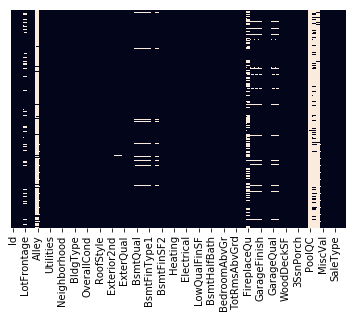

In [39]:
sb.heatmap(train_data.isnull(),yticklabels=False,cbar=False)

In [40]:
train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
train_data.drop(['MiscFeature'],axis=1,inplace=True)
train_data.drop(['PoolQC'],axis=1,inplace=True)
train_data.drop(['Alley'],axis=1,inplace=True)


In [46]:
train_data['Fence']
train_data.drop(['Fence'],axis=1,inplace=True)
train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
#train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())
#train_data['LotFrontage']=train_data['LotFrontage'].fillna(train_data['LotFrontage'].mean())

In [50]:
train_data.shape
train_data['FireplaceQu']=train_data['FireplaceQu'].fillna(train_data['FireplaceQu'].mode())

In [52]:
train_data['FireplaceQu'].value_counts()

AttributeError: 'Series' object has no attribute 'values_counts'